In [1]:
%matplotlib inline


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from importlib import reload

import lnPi

In [43]:
#function to tag 'LD' and 'HD' phases
def tag_phases(x):
    if x.base.num_phases_max !=2:
        raise ValueError('bad tag function')

    return np.where(x.argmax[0] <= x.base.shape[0] / 2, 0, 1)

    if x.nphase==1:
        
        if x[0].density.values<0.5:
            return np.array([0])
        else:
            return np.array([1])
    
    elif x.nphase==2:
        return np.argsort(x.argmax[0])
    else:
        raise ValueError('bad nphase')


def tag_phases_other(x):
    return np.argsort(x.argmax[0])
            

# create a reference lnPi_phases for bulk case

In [92]:
base = lnPi.lnPi.from_table('./PiofN/ljsf.t070.bulk.v729.r1.lnpi.dat', mu=-8.6160, volume=729, beta=1.0/0.7, num_phases_max=2)

In [28]:
lnpi_bulk = lnPi.Phases(base, argmax_kwargs=dict(min_distance=[1, 5,10,20,50]), ftag_phases=tag_phases)

In [29]:
lnpi_bulk.nave

<xarray.DataArray 'nave' (phase: 2, component: 1)>
array([[  2.642528],
       [598.92802 ]])
Coordinates:
    mu_0     float64 -8.616
    beta     float64 1.429
    volume   int64 729
Dimensions without coordinates: phase, component

In [30]:
base.lnpi

<xarray.DataArray 'lnpi' (n_0: 661)>
array([-18.06161 , -17.156572, -16.919848, ..., -67.631954, -70.228706,
       -72.847337])
Coordinates:
    mu_0     float64 -8.616
    beta     float64 1.429
    volume   int64 729
Dimensions without coordinates: n_0
Attributes:
    dims_n:          ['n_0']
    dims_mu:         ['mu_0']
    dims_comp:       ['component']
    dims_state:      ['mu_0', 'beta', 'volume']
    lnpi_zero:       -18.06161029539
    state_as_attrs:  0
    num_phases_max:  2

In [31]:
lnpi_bulk

In [32]:
import xarray as xr

## create a collection

In [52]:
base = lnPi.lnPi.from_table('./PiofN/ljsf.t070.bulk.v729.r1.lnpi.dat', mu=-8.6160, volume=729, beta=1.0/0.7, num_phases_max=2)
lnpi_bulk = lnPi.Phases(base, argmax_kwargs=dict(min_distance=[5,10,20,50]), ftag_phases=tag_phases)

In [53]:
C = lnPi.Collection.from_mu(lnpi_bulk, [None], np.linspace(-12, -5, 20))

C.get_spinodals()
C.get_binodals()

C.sort_by_mu(inplace=True)

In [54]:
n_cut = 0.1

C.nave_phase.to_dataframe().query('mu_0 < -10 and rec in [1, 3]')#.loc[(0,1,slice(None)),:]

mu_0      beta  volume      nave
rec phase component                                       
1   0     0         -11.631579  1.428571     729  0.033303
    1     0         -11.631579  1.428571     729       NaN
3   0     0         -10.894737  1.428571     729  0.095570
    1     0         -10.894737  1.428571     729       NaN

In [55]:
lnpi_bulk.nave * lnpi_bulk.chempot

<xarray.DataArray (phase: 2, component: 1)>
array([[  -22.768022],
       [-5160.363822]])
Coordinates:
    mu_0     float64 -8.616
    beta     float64 1.429
    volume   int64 729
Dimensions without coordinates: phase, component

In [56]:
C.nave_phase.to_dataframe()

mu_0      beta  volume        nave
rec phase component                                         
0   0     0         -12.000000  1.428571     729    0.019668
    1     0         -12.000000  1.428571     729         NaN
1   0     0         -11.631579  1.428571     729    0.033303
    1     0         -11.631579  1.428571     729         NaN
2   0     0         -11.263158  1.428571     729    0.056405
    1     0         -11.263158  1.428571     729         NaN
3   0     0         -10.894737  1.428571     729    0.095570
    1     0         -10.894737  1.428571     729         NaN
4   0     0         -10.526316  1.428571     729    0.162040
    1     0         -10.526316  1.428571     729         NaN
5   0     0         -10.157895  1.428571     729    0.275064
    1     0         -10.157895  1.428571     729         NaN
6   0     0          -9.789474  1.428571     729    0.467862
    1     0          -9.789474  1.428571     729         NaN
7   0     0          -9.588327  1.428571     729    0.626099
    1     0          -9.588327  1.428571     729  523.654430
8   0     0          -9.421053  1.428571     729    0.798565
    1     0          -9.421053  1.428571     729  547.001853
9   0     0          -9.052632  1.428571     729    1.371389
    1     0          -9.052632  1.428571     729  575.787274
10  0     0          -8.684211  1.428571     729    2.381375
    1     0          -8.684211  1.428571     729  595.731965
11  0     0          -8.637334  1.428571     729    2.557705
    1     0          -8.637334  1.428571     729  597.939083
12  0     0          -8.315789  1.428571     729    4.223758
    1     0          -8.315789  1.428571     729  611.722596
13  0     0          -7.947368  1.428571     729    7.844650
    1     0          -7.947368  1.428571     729  625.401490
14  0     0          -7.578947  1.428571     729   17.123071
    1     0          -7.578947  1.428571     729  637.100006
15  0     0          -7.468247  1.428571     729   23.573185
    1     0          -7.468247  1.428571     729  640.417664
16  0     0          -7.210526  1.428571     729         NaN
    1     0          -7.210526  1.428571     729  647.899613
17  0     0          -6.842105  1.428571     729         NaN
    1     0          -6.842105  1.428571     729  655.986438
18  0     0          -6.473684  1.428571     729         NaN
    1     0          -6.473684  1.428571     729  658.667311
19  0     0          -6.105263  1.428571     729         NaN
    1     0          -6.105263  1.428571     729  659.430603
20  0     0          -5.736842  1.428571     729         NaN
    1     0          -5.736842  1.428571     729  659.717852
21  0     0          -5.368421  1.428571     729         NaN
    1     0          -5.368421  1.428571     729  659.848778
22  0     0          -5.000000  1.428571     729         NaN
    1     0          -5.000000  1.428571     729  659.915455

In [57]:
da_base = base.to_dataarray(state_as_attrs=True)
da_coll = C.to_dataarray()

In [59]:
da_base

<xarray.DataArray 'lnpi' (n_0: 661)>
array([-18.06161 , -17.156572, -16.919848, ..., -67.631954, -70.228706,
       -72.847337])
Dimensions without coordinates: n_0
Attributes:
    dims_n:          ['n_0']
    dims_mu:         ['mu_0']
    dims_comp:       ['component']
    dims_state:      ['mu_0', 'beta', 'volume']
    lnpi_zero:       -18.06161029539
    state_as_attrs:  1
    num_phases_max:  2
    mu_0:            -8.616
    beta:            1.4285714285714286
    volume:          729

In [58]:
import xarray as xr

xr.merge((da_base, da_coll)).to_netcdf('tmp.nc')
ds = xr.open_dataset('tmp.nc')

PermissionError: [Errno 13] Permission denied: b'/Users/wpk/Documents/python/projects/lnPi/examples/1D/tmp.nc'

In [60]:
da_coll

<xarray.DataArray 'labels' (rec: 23, n_0: 661)>
array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2]], dtype=uint8)
Coordinates:
    mu_0       (rec) float64 -12.0 -11.63 -11.26 -10.89 ... -5.737 -5.368 -5.0
    beta       (rec) float64 1.429 1.429 1.429 1.429 ... 1.429 1.429 1.429 1.429
    volume     (rec) int64 729 729 729 729 729 729 ... 729 729 729 729 729 729
    spinodals  (rec) uint8 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
    binodals   (rec) uint8 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
Dimensions without coordinates: rec, n_0

In [61]:
base2 = lnPi.core.Base.from_dataarray(ds.lnpi)
C2 = lnPi.core.Collection.from_dataarray(base2, ds.labels)

AttributeError: module 'lnPi.core' has no attribute 'Base'

In [62]:
print(C.spinodals[0]._repr_html_())
print(C.spinodals[1]._repr_html_())
print(C.binodals[0]._repr_html_())

Phases: nphase=2, mu=[-7.46824698]
Phases: nphase=2, mu=[-9.58832717]
Phases: nphase=2, mu=[-8.63733388]


In [63]:
def make_omega_vs_mu_phase_plot(C,spin=None,bino=None,ax=None,ax_labels=True):
    if ax is None:
        fig,ax = plt.subplots()
        
    if spin is None:
        spin = C.spinodals

    if bino is None:
        bino = C.binodals[0]
    
    for phase, g in C.omega_phase().groupby('phase'):
        ax.plot(g.mu_0, g)
#     for phase, g in C.Omegas_phaseIDs().reset_index().groupby('phase'):
#         g.plot('mu_0','Omega', ax=ax)
    colors = [l.get_color() for l in ax.lines]
    
    for phase, (s, c) in enumerate(zip(spin, colors)):
        s.omega_phase().sel(phase=phase).pipe(lambda x: ax.plot(x.mu_0, x, marker='o', color=c))
    
    bino.omega_phase().sel(phase=0).pipe(lambda x: ax.plot(x.mu_0, x, marker='s', color='k'))
#     for phase, (s, c) in enumerate(zip(spin, colors)):
#         s.Omegas_phaseIDs().xs(phase, level='phase').reset_index().plot('mu_0','Omega', marker='o', color=c, ax=ax)
#     bino.Omegas_phaseIDs().xs(0, level='phase').reset_index().plot('mu_0','Omega', marker='s', color='k', ax=ax)
    


    if ax_labels:
        ax.set_ylabel(r'$\Omega^{ex}$')
        ax.set_xlabel(r'$\mu$')
    

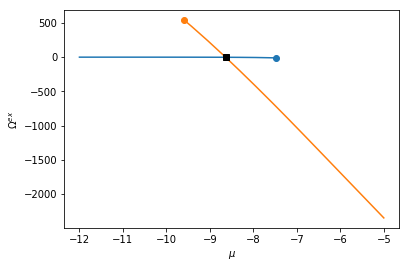

In [64]:
#plot
make_omega_vs_mu_phase_plot(C)

# bulk 065

In [65]:
base_bulk = lnPi.lnPi.from_table('./PiofN/ljcut.t065.bulk.v1000.r1.lnpi.dat', mu=-4.453015418106743E+00,
                               volume=1000.0E0,num_phases_max=2,beta=1./0.65000E0)

lnpi_bulk = lnPi.Phases(base_bulk,argmax_kwargs=dict(min_distance=[5,10,20,40]),
                                ftag_phases=tag_phases)

In [66]:
Cbulk = lnPi.Collection.from_mu(lnpi_bulk,[None],np.linspace(-7,.2,50))
Cbulk.get_spinodals()
Cbulk.get_binodals()

Cbulk.sort_by_mu(inplace=True)

In [67]:
psat = (-Cbulk.binodals[0].omega_phase().sel(phase=0) / Cbulk[0].base.volume).values

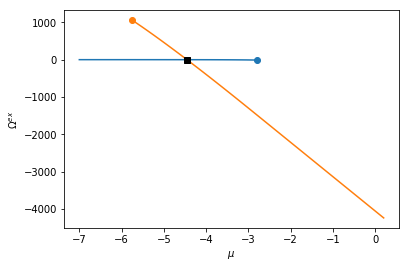

In [68]:
make_omega_vs_mu_phase_plot(Cbulk)

# confined

In [69]:
def tag_phases_conf(x):
    if x.base.num_phases_max !=2:
        raise ValueError('bad tag function')
        
    L = []
    for p in x.phases:
        if p.density.values<0.5:
            val = 0
        else:
            val = 1
        L.append(val)
        
    L = np.array(L)
    


    return L

In [71]:
#make up a volume
base_conf = lnPi.lnPi.from_table('./PiofN/ljcut.t065.finiteslit.L_20nm.W_4nm.r2.lnpi.dat',mu=-0.500000E+01,volume=7000.,beta=1./0.65000E0,
                                num_phases_max=2)

lnpi_conf = lnPi.Phases(base_conf,argmax_kwargs=dict(min_distance=[5,10,20,40]),ftag_phases=tag_phases_conf,
                                build_kwargs=dict(merge_phaseIDs=True))

In [42]:
Cconf = lnPi.Collection.from_mu(lnpi_conf,[None],np.linspace(-6,-5.0,100)) #np.linspace(-8,-5,10)

Cconf.get_spinodals()

Cconf.get_binodals()
Cconf.sort_by_mu(inplace=True)

(-5.14, -5.09)

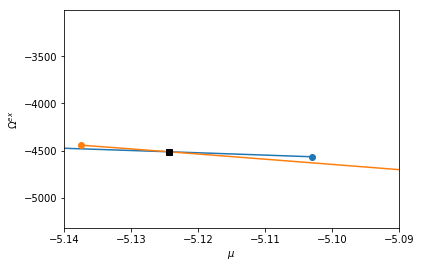

In [43]:
make_omega_vs_mu_phase_plot(Cconf.merge_phases(efac=0.9),Cconf.spinodals,Cconf.binodals[0])


ax=plt.gca()
ax.set_xlim(-5.14,-5.09)

In [44]:
df=pd.read_table('./PiofN/ljcut.t065.finiteslit.L_20nm.W_4nm.r2.single_isotherm.txt',sep='\s+',
                 header=None,names=['pscaled','mu','rho','Omega_L','Qst','Gads'])


/Users/wpk/.conda/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead.
  


In [45]:
#make isotherm

In [46]:
a = np.log(np.logspace(np.exp(-10), np.exp(Cconf.spinodals[1].mu[0]), 100))

In [47]:
np.linspace(-10, -1)

array([-10.        ,  -9.81632653,  -9.63265306,  -9.44897959,
        -9.26530612,  -9.08163265,  -8.89795918,  -8.71428571,
        -8.53061224,  -8.34693878,  -8.16326531,  -7.97959184,
        -7.79591837,  -7.6122449 ,  -7.42857143,  -7.24489796,
        -7.06122449,  -6.87755102,  -6.69387755,  -6.51020408,
        -6.32653061,  -6.14285714,  -5.95918367,  -5.7755102 ,
        -5.59183673,  -5.40816327,  -5.2244898 ,  -5.04081633,
        -4.85714286,  -4.67346939,  -4.48979592,  -4.30612245,
        -4.12244898,  -3.93877551,  -3.75510204,  -3.57142857,
        -3.3877551 ,  -3.20408163,  -3.02040816,  -2.83673469,
        -2.65306122,  -2.46938776,  -2.28571429,  -2.10204082,
        -1.91836735,  -1.73469388,  -1.55102041,  -1.36734694,
        -1.18367347,  -1.        ])

In [48]:
a = np.log(np.linspace(np.exp(-10), np.exp(Cconf.spinodals[1].mu[0]), 20, endpoint=False))

In [49]:
#a = np.linspace(-10,Cconf.spinodals[1].mu[0],200)
b = np.linspace(Cconf.spinodals[1].mu[0],Cconf.spinodals[0].mu[0],20)
c = np.linspace(Cconf.spinodals[0].mu[0],Cbulk.binodals[0].mu[0],20)
mus = np.concatenate((a,b,c))
#mus = c

In [50]:
Cb = lnPi.core.Collection.from_mu(lnpi_bulk,[None],x=mus)
Cc = lnPi.core.Collection.from_mu_iter(lnpi_conf,Cb.mus)

In [51]:
P = (-Cb.omega_phase().sel(phase=0) / Cb[0].base.volume / psat)

In [52]:
rho = Cc.nave_phase

In [53]:
iso = rho.to_dataframe().reset_index().merge(P.rename('pressure').to_dataframe().drop('phase', axis=1), on=['mu_0','beta'])

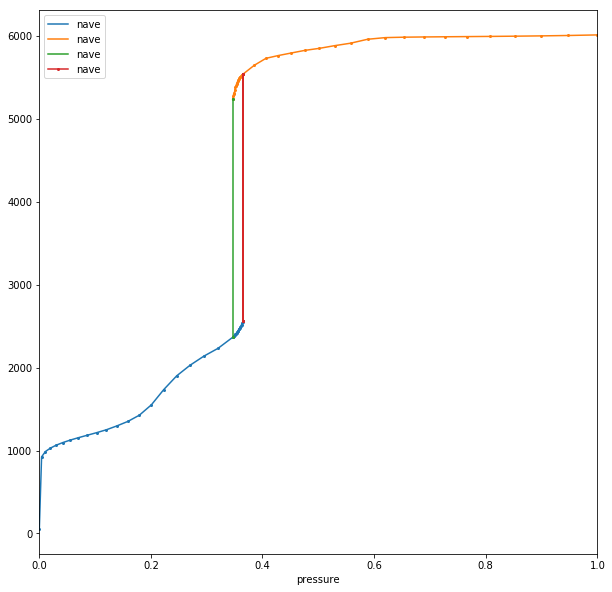

In [54]:
fig,ax = plt.subplots(figsize=(10,10))
for phase, g in iso.groupby('phase'):
    g.plot('pressure','nave', ax=ax,marker='o', ms=2)

iso.query('mu_0==@b[0]').drop_duplicates().plot('pressure','nave', ax=ax, marker='o', ms=2)
iso.query('mu_0==@b[-1]').drop_duplicates().plot('pressure','nave', ax=ax, marker='o', ms=2)

# plt.plot(df.pscaled,df.rho,'--', marker='o', ms=2)
# plt.gca().set_xlim(0,1.0)

(0.3, 0.5)

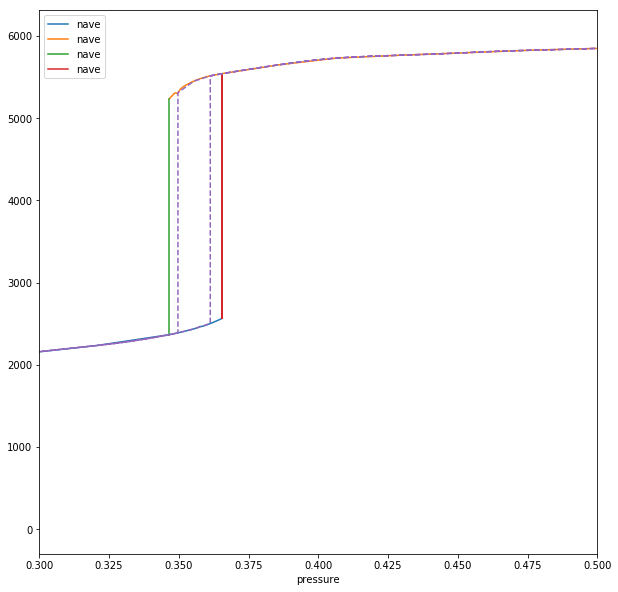

In [55]:
fig,ax = plt.subplots(figsize=(10,10))
for phase, g in iso.groupby('phase'):
    g.plot('pressure','nave', ax=ax)

iso.query('mu_0==@b[0]').drop_duplicates().plot('pressure','nave', ax=ax)
iso.query('mu_0==@b[-1]').drop_duplicates().plot('pressure','nave', ax=ax)

plt.plot(df.pscaled,df.rho,'--')
plt.gca().set_xlim(0.3,0.5)



In [74]:
# hard one